# Project On Thyroid Detection Using Machine Learning Algorithms

In [1]:
#import required libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("hypothyroid.data")

In [4]:
data.columns = ["class","age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI","TBG_measured","TBG"]

In [5]:
data.head()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
1,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
2,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
3,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
4,hypothyroid,85,F,f,f,f,f,t,f,f,...,y,1.10,y,27,y,1.19,y,23,n,?


In [6]:
data.shape
# rows 3162 columns 26

(3162, 26)

In [7]:
data.describe()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3162,3162,3162,3162,3162,3162,3162,3162,3162,3162,...,3162,3162,3162,3162,3162,3162,3162,3162,3162,3162
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2701,3107,3120,3058,2921,2919,3099,...,2467,695,2913,249,2914,248,2915,247,2902,2902


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 26 columns):
class                        3162 non-null object
age                          3162 non-null object
sex                          3162 non-null object
on_thyroxine                 3162 non-null object
query_on_thyroxine           3162 non-null object
on_antithyroid_medication    3162 non-null object
thyroid_surgery              3162 non-null object
query_hypothyroid            3162 non-null object
query_hyperthyroid           3162 non-null object
pregnant                     3162 non-null object
sick                         3162 non-null object
tumor                        3162 non-null object
lithium                      3162 non-null object
goitre                       3162 non-null object
TSH_measured                 3162 non-null object
TSH                          3162 non-null object
T3_measured                  3162 non-null object
T3                           3162 non-null 

In [9]:
# lets check null values
data.isnull().sum()

class                        0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [10]:
# data does not have null values in it but has ?.... which need to be replaced by NaN
data["TBG"].value_counts().head(10)

?     2902
28      14
21      13
25      13
23      13
31      12
20      12
30      12
29      10
19      10
Name: TBG, dtype: int64

In [11]:
data.replace("?",np.nan, inplace=True)

In [12]:
# Now we can see the all ? are getting replaced by NaN values
data.head()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,NaN
1,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,NaN
2,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,NaN
3,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,NaN
4,hypothyroid,85,F,f,f,f,f,t,f,f,...,y,1.10,y,27,y,1.19,y,23,n,NaN


In [13]:
#  check number of nulls in dataset
data.isnull().sum()

class                           0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2902
dtype: int64

In [14]:
data.describe()
# we can see the number of elements, total unique values, top val, and frequency of top val

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3162,2716,3089,3162,3162,3162,3162,3162,3162,3162,...,3162,2467,3162,2913,3162,2914,3162,2915,3162,260
unique,2,92,2,2,2,2,2,2,2,2,...,2,69,2,268,2,158,2,280,2,52
top,negative,59,F,f,f,f,f,f,f,f,...,y,1.60,y,98,y,0.98,y,98,n,28
freq,3012,64,2182,2701,3107,3120,3058,2921,2919,3099,...,2467,141,2913,50,2914,86,2915,55,2902,14


In [15]:
#we found that there are maximum null values in column TBG, it is better to remove it
data.drop(["TBG"], axis = 1, inplace= True)

In [16]:
data.head()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,15,F,t,f,f,f,f,f,f,...,145,y,1.70,y,19,y,1.13,y,17,n
1,hypothyroid,24,M,f,f,f,f,f,f,f,...,0,y,0.20,y,4,y,1,y,0,n
2,hypothyroid,24,F,f,f,f,f,f,f,f,...,430,y,0.40,y,6,y,1.04,y,6,n
3,hypothyroid,77,M,f,f,f,f,f,f,f,...,7.30,y,1.20,y,57,y,1.28,y,44,n
4,hypothyroid,85,F,f,f,f,f,t,f,f,...,138,y,1.10,y,27,y,1.19,y,23,n


In [17]:
# import label_encoder, and apply label encoding on all columns which have categorical 
# values, , also as all our columns have dtype as "object", so label encoder needs a str or numeric input,
# we converted object type to string type
# Six columns are having continuous value but their dtype is "object" so converted it to 
# float type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ["class","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","thyroid_surgery","query_hypothyroid","query_hyperthyroid","pregnant","sick","tumor","lithium","goitre","TSH_measured","T3_measured","TT4_measured","T4U_measured","FTI_measured","TBG_measured"]
for i in cols:
    data[i] = data[i].astype(str)
    data[i] = le.fit_transform(data[i])

    
cols1 = ["age","TSH","T3","TT4","T4U","FTI"]

for j in cols1:
    data[j] = data[j].astype(float)



In [18]:
data['age'].isnull().sum()
pd.set_option("display.max_columns", 26)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 25 columns):
class                        3162 non-null int64
age                          2716 non-null float64
sex                          3162 non-null int64
on_thyroxine                 3162 non-null int64
query_on_thyroxine           3162 non-null int64
on_antithyroid_medication    3162 non-null int64
thyroid_surgery              3162 non-null int64
query_hypothyroid            3162 non-null int64
query_hyperthyroid           3162 non-null int64
pregnant                     3162 non-null int64
sick                         3162 non-null int64
tumor                        3162 non-null int64
lithium                      3162 non-null int64
goitre                       3162 non-null int64
TSH_measured                 3162 non-null int64
TSH                          2694 non-null float64
T3_measured                  3162 non-null int64
T3                           2467 non-null float64
TT4_m

In [20]:
data['age'].isnull().sum()

446

In [21]:
data.fillna(data.mean(), inplace=True)

In [22]:
data['age'].isnull().sum()

0

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Data columns (total 25 columns):
class                        3162 non-null int64
age                          3162 non-null float64
sex                          3162 non-null int64
on_thyroxine                 3162 non-null int64
query_on_thyroxine           3162 non-null int64
on_antithyroid_medication    3162 non-null int64
thyroid_surgery              3162 non-null int64
query_hypothyroid            3162 non-null int64
query_hyperthyroid           3162 non-null int64
pregnant                     3162 non-null int64
sick                         3162 non-null int64
tumor                        3162 non-null int64
lithium                      3162 non-null int64
goitre                       3162 non-null int64
TSH_measured                 3162 non-null int64
TSH                          3162 non-null float64
T3_measured                  3162 non-null int64
T3                           3162 non-null float64
TT4_m

In [24]:
data.corr().head()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
class,1.000000,-0.033887,0.025714,0.033174,0.029691,0.012897,-0.042262,-0.048035,0.025289,0.021172,0.023035,0.025260,0.005614,-0.011136,-0.088823,-0.582430,-0.068151,0.185063,-0.065245,0.375013,-0.065103,-0.078217,-0.064960,0.314855,0.050550
age,-0.033887,1.000000,-0.004841,-0.001326,-0.019720,-0.058914,-0.012218,0.048442,-0.087787,-0.159331,0.064714,-0.063063,-0.021314,-0.037124,0.201322,-0.007804,0.176686,-0.268285,0.126311,-0.090490,0.124034,-0.195670,0.124583,0.016104,-0.128749
sex,0.025714,-0.004841,1.000000,-0.125472,0.035887,-0.026596,-0.036404,-0.076526,-0.061717,-0.082931,0.010628,-0.012678,-0.016175,-0.087539,0.027256,-0.032815,0.097970,-0.039043,0.083696,-0.116438,0.083094,-0.287384,0.084765,0.154036,-0.085758
on_thyroxine,0.033174,-0.001326,-0.125472,1.000000,-0.013838,-0.024449,0.029332,0.070464,-0.088918,-0.001186,-0.063982,-0.022707,-0.010393,-0.022815,0.073770,-0.002995,-0.161599,0.018651,0.060897,0.214037,0.060523,0.072302,0.063487,0.113335,-0.064939
query_on_thyroxine,0.029691,-0.019720,0.035887,-0.013838,1.000000,-0.015437,0.016154,-0.019983,-0.038388,-0.018970,-0.023920,0.049876,-0.003347,0.003861,-0.108039,-0.014932,-0.087105,-0.015195,0.038899,-0.020213,0.038814,-0.034522,0.038729,-0.004472,-0.039824


In [25]:
#class has strong correlation with Strong Negative Corr with TSH, Positie with T3, TT4

import seaborn as sns
ax = sns.pairplot(data, vars= ["class","TSH","T3","TT4"])

In [26]:
col2 = ["class","TSH","T3","TT4"]
data[col2].corr()

# we found that these columns have good correlation

,class,TSH,T3,TT4
class,1.000000,-0.582430,0.185063,0.375013
TSH,-0.582430,1.000000,-0.171224,-0.309110
T3,0.185063,-0.171224,1.000000,0.544911
TT4,0.375013,-0.309110,0.544911,1.000000


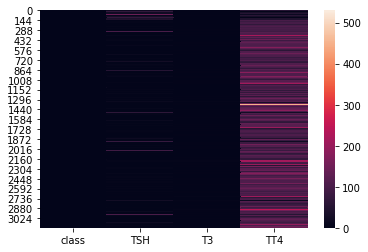

In [27]:
sns.heatmap(data[col2])

Lets get started with data spiliting

In [28]:

# split input and output data
y = data.iloc[:,0:1]
x = data.iloc[:,1:]


In [29]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,15.0,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0
1,24.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0
2,24.0,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0
3,77.0,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0
4,85.0,0,0,0,0,0,1,0,0,0,0,0,0,1,138.0,1,1.1,1,27.0,1,1.19,1,23.0,0


In [30]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [31]:
print("x shape:", x.shape, "y shape:",y.shape)

x shape: (3162, 24) y shape: (3162, 1)


In [32]:
from sklearn.model_selection import train_test_split
# data spitting for trainig and testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.20, random_state = 42)

In [54]:
# Model imlementation
# DT out performs with max depth = 2 , and all other default attributes
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2, min_samples_split=2,min_samples_leaf=1)
model.fit(xtrain, ytrain)
pred = model.predict(xtest)

In [52]:
n_ytest = np.array(ytest)
model.score(xtest,pred)

1.0

In [53]:
# calculate accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(ytest, pred) * 100
cm = confusion_matrix(ytest, pred)
cr = classification_report(ytest, pred)

print("Accuracy = ",acc)
print("Confuion Matrics = \n", cm)
print("Classification_Report = ")
print(cr)

Accuracy =  99.21011058451816
Confuion Matrics = 
 [[ 34   3]
 [  2 594]]
Classification_Report = 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.99      1.00      1.00       596

    accuracy                           0.99       633
   macro avg       0.97      0.96      0.96       633
weighted avg       0.99      0.99      0.99       633

